# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
%matplotlib inline

import warnings
import os

import seaborn as sns
import pandas as pd
import numpy as np

from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt
from collections import Counter

warnings.warn('ignore')
PATH_TO_DATA = '../data'

C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: ignore


In [3]:
orange_small_churn_data = pd.read_csv(os.path.join(PATH_TO_DATA, 'orange_small_churn_data.train'))
orange_small_churn_labels = pd.read_csv(os.path.join(PATH_TO_DATA, 'orange_small_churn_labels.train'), header=None)
orange_small_churn_labels.columns = ['lbl']

In [4]:
orange_small_churn_data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [5]:
orange_small_churn_labels.head()

,lbl
0,-1
1,-1
2,-1
3,1
4,-1


2\. Рассчитайте доли классов `отток` и `не отток`.

In [6]:
lbl_counts = orange_small_churn_labels.lbl.value_counts()
print(lbl_counts)
outflow = lbl_counts[1] / orange_small_churn_labels.shape[0]
no_outflow = lbl_counts[-1] / orange_small_churn_labels.shape[0]

print('Доля класса отток ', outflow)
print('Доля класса не отток ', no_outflow)

-1    37024
 1     2976
Name: lbl, dtype: int64
Доля класса отток  0.0744
Доля класса не отток  0.9256


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [7]:
orange_small_churn_data.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,570.000000,1006.000000,1005.000000,1275.000000,1.165000e+03,35565.000000,35560.000000,0.0,570.000000,1.165000e+03,...,1.006000e+03,1006.000000,0.0,570.000000,570.00000,1006.000000,16785.000000,266.000000,0.0,0.0
mean,11.003509,0.004970,429.328358,0.148235,2.490555e+05,1319.915394,6.792126,NaN,47.487719,3.813466e+05,...,8.067657e+04,7.419483,NaN,3.515789,16.05614,165.108310,270.585523,22637.159019,NaN,NaN
std,34.952792,0.157642,4470.405915,1.396054,6.762021e+05,2609.955770,6.287285,NaN,147.137816,9.353348e+05,...,2.141650e+05,34.642351,NaN,9.412473,54.96505,113.400173,86.723561,30843.320634,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2419.965000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,854.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,196.410000,270.000000,12612.240000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.172150e+05,1435.000000,7.000000,NaN,46.000000,2.419740e+05,...,4.260950e+04,8.000000,NaN,6.000000,14.00000,250.980000,330.000000,32209.560000,NaN,NaN
max,536.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,35.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1000.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


In [8]:
orange_small_churn_data.info(['verbose'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 230 columns):
Var1      float64
Var2      float64
Var3      float64
Var4      float64
Var5      float64
Var6      float64
Var7      float64
Var8      float64
Var9      float64
Var10     float64
Var11     float64
Var12     float64
Var13     float64
Var14     float64
Var15     float64
Var16     float64
Var17     float64
Var18     float64
Var19     float64
Var20     float64
Var21     float64
Var22     float64
Var23     float64
Var24     float64
Var25     float64
Var26     float64
Var27     float64
Var28     float64
Var29     float64
Var30     float64
Var31     float64
Var32     float64
Var33     float64
Var34     float64
Var35     float64
Var36     float64
Var37     float64
Var38     float64
Var39     float64
Var40     float64
Var41     float64
Var42     float64
Var43     float64
Var44     float64
Var45     float64
Var46     float64
Var47     float64
Var48     float64
Var49     float64
Var50   

In [9]:
df_numeric = orange_small_churn_data[orange_small_churn_data.columns[:-40]]

In [10]:
df_numeric.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.0,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
empty_cols = []
for c in orange_small_churn_data.columns[:-40]:
    if orange_small_churn_data[c].dropna().shape[0] == 0:
        empty_cols.append(c)
        
print(len(empty_cols))
print(empty_cols)

16
['Var8', 'Var15', 'Var20', 'Var31', 'Var32', 'Var39', 'Var42', 'Var48', 'Var52', 'Var55', 'Var79', 'Var141', 'Var167', 'Var169', 'Var175', 'Var185']


In [12]:
ch2_dict = {}
for c in df_numeric.columns:
    if df_numeric[c].dropna().shape[0] != 0:
        _, corr, _, _ = chi2_contingency(pd.crosstab(df_numeric[c], orange_small_churn_labels.lbl))
        ch2_dict[c] = abs(corr)
        print('Correlation with {} = {}'.format(c, corr))

Correlation with Var1 = 0.33849692767179806
Correlation with Var2 = 0.020135182126200576
Correlation with Var3 = 1.3285732190591146e-08
Correlation with Var4 = 0.9385658813293998
Correlation with Var5 = 0.9825073498714879
Correlation with Var6 = 0.9597715560643074
Correlation with Var7 = 1.0839723251690087e-49
Correlation with Var9 = 0.04404739069027033
Correlation with Var10 = 0.9997918917411036
Correlation with Var11 = 0.8349256272496391
Correlation with Var12 = 0.0043827741222099955
Correlation with Var13 = 1.0
Correlation with Var14 = 0.9970834874862956
Correlation with Var16 = 0.967289699239103
Correlation with Var17 = 0.39714117267090293
Correlation with Var18 = 0.5953070587905887
Correlation with Var19 = 1.7747578966377493e-05
Correlation with Var21 = 0.006324424503375998
Correlation with Var22 = 0.011893416313807421
Correlation with Var23 = 0.9778158959605352
Correlation with Var24 = 0.34312517268492587
Correlation with Var25 = 0.35066042033106
Correlation with Var26 = 0.984746

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [13]:
df_numeric['target'] = orange_small_churn_labels.lbl

C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
top = pd.Series(ch2_dict).sort_values(ascending=False).index[:20]

In [15]:
top

Index(['Var125', 'Var13', 'Var118', 'Var140', 'Var76', 'Var133', 'Var163',
       'Var43', 'Var10', 'Var89', 'Var153', 'Var115', 'Var113', 'Var95',
       'Var14', 'Var94', 'Var33', 'Var91', 'Var71', 'Var134'],
      dtype='object')

In [16]:
numeric_cols = orange_small_churn_data.columns[:-41]

Wall time: 5.36 s


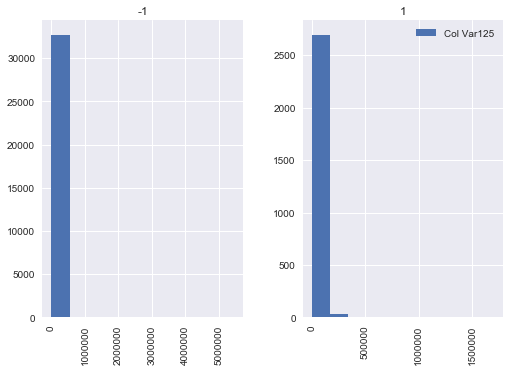

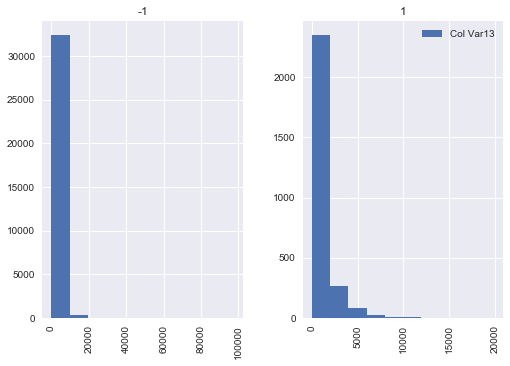

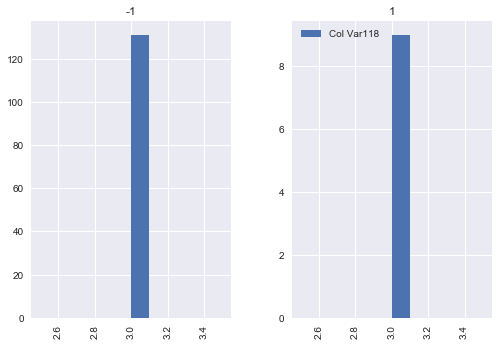

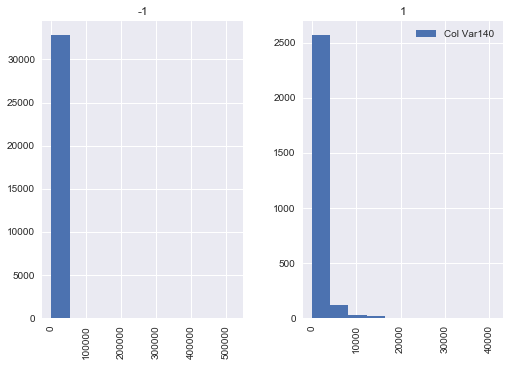

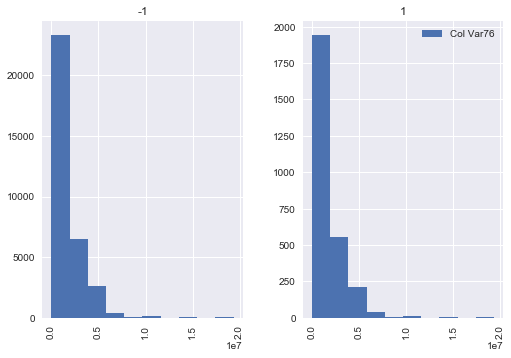

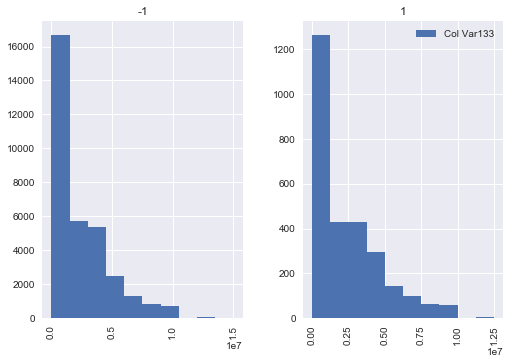

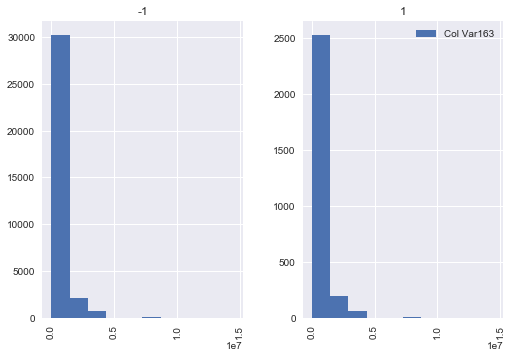

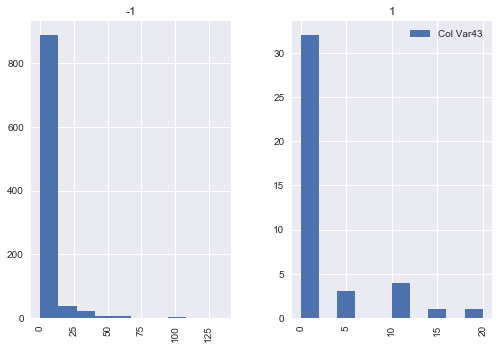

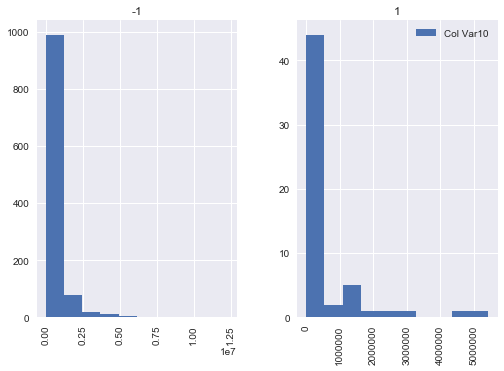

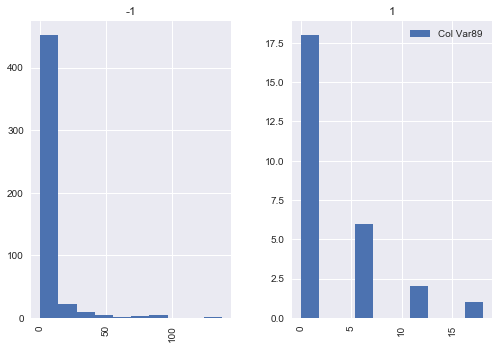

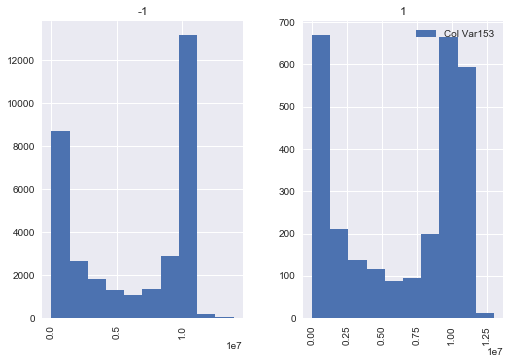

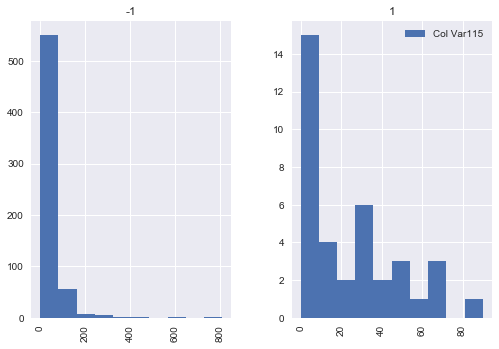

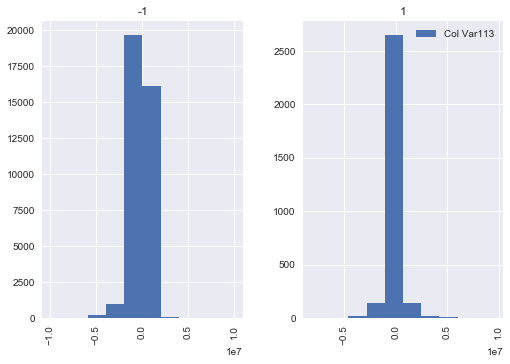

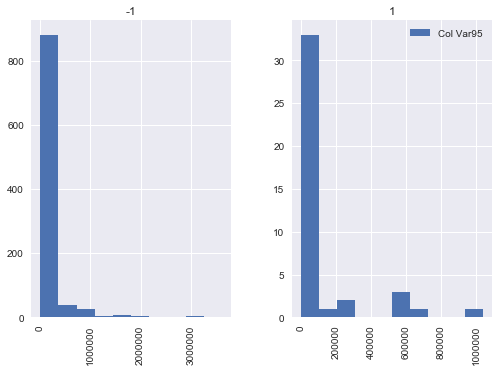

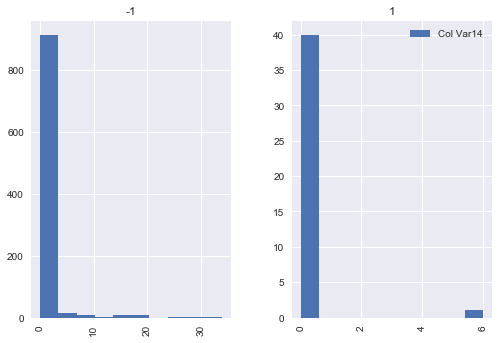

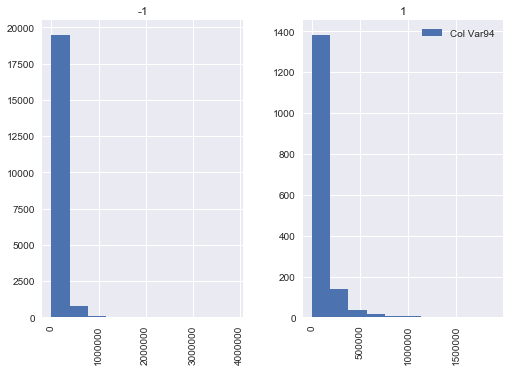

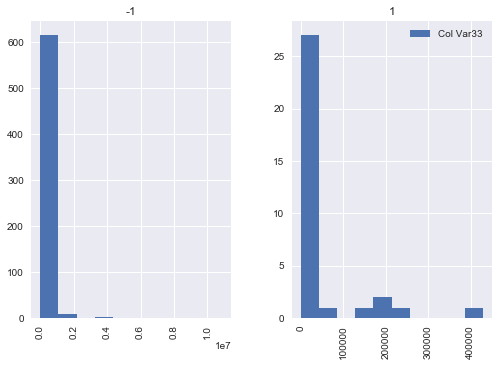

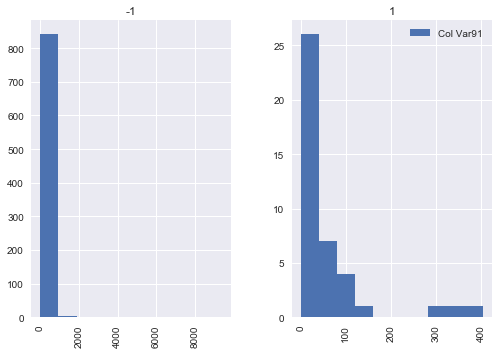

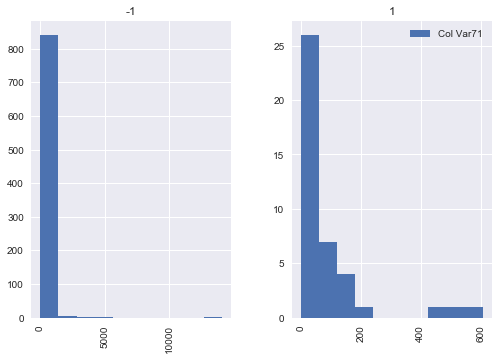

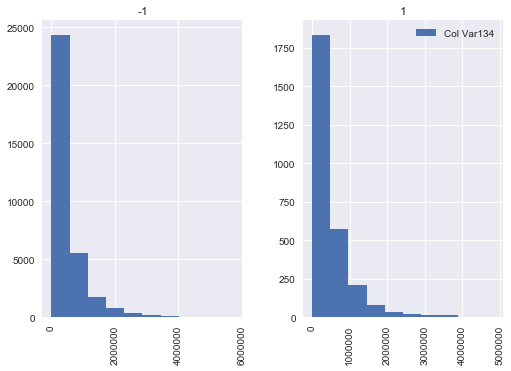

In [17]:
%%time
for c in top:
    df_numeric[c].hist(by=df_numeric.target, label='Col {}'.format(c))
    plt.legend()

C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Wall time: 2min 14s


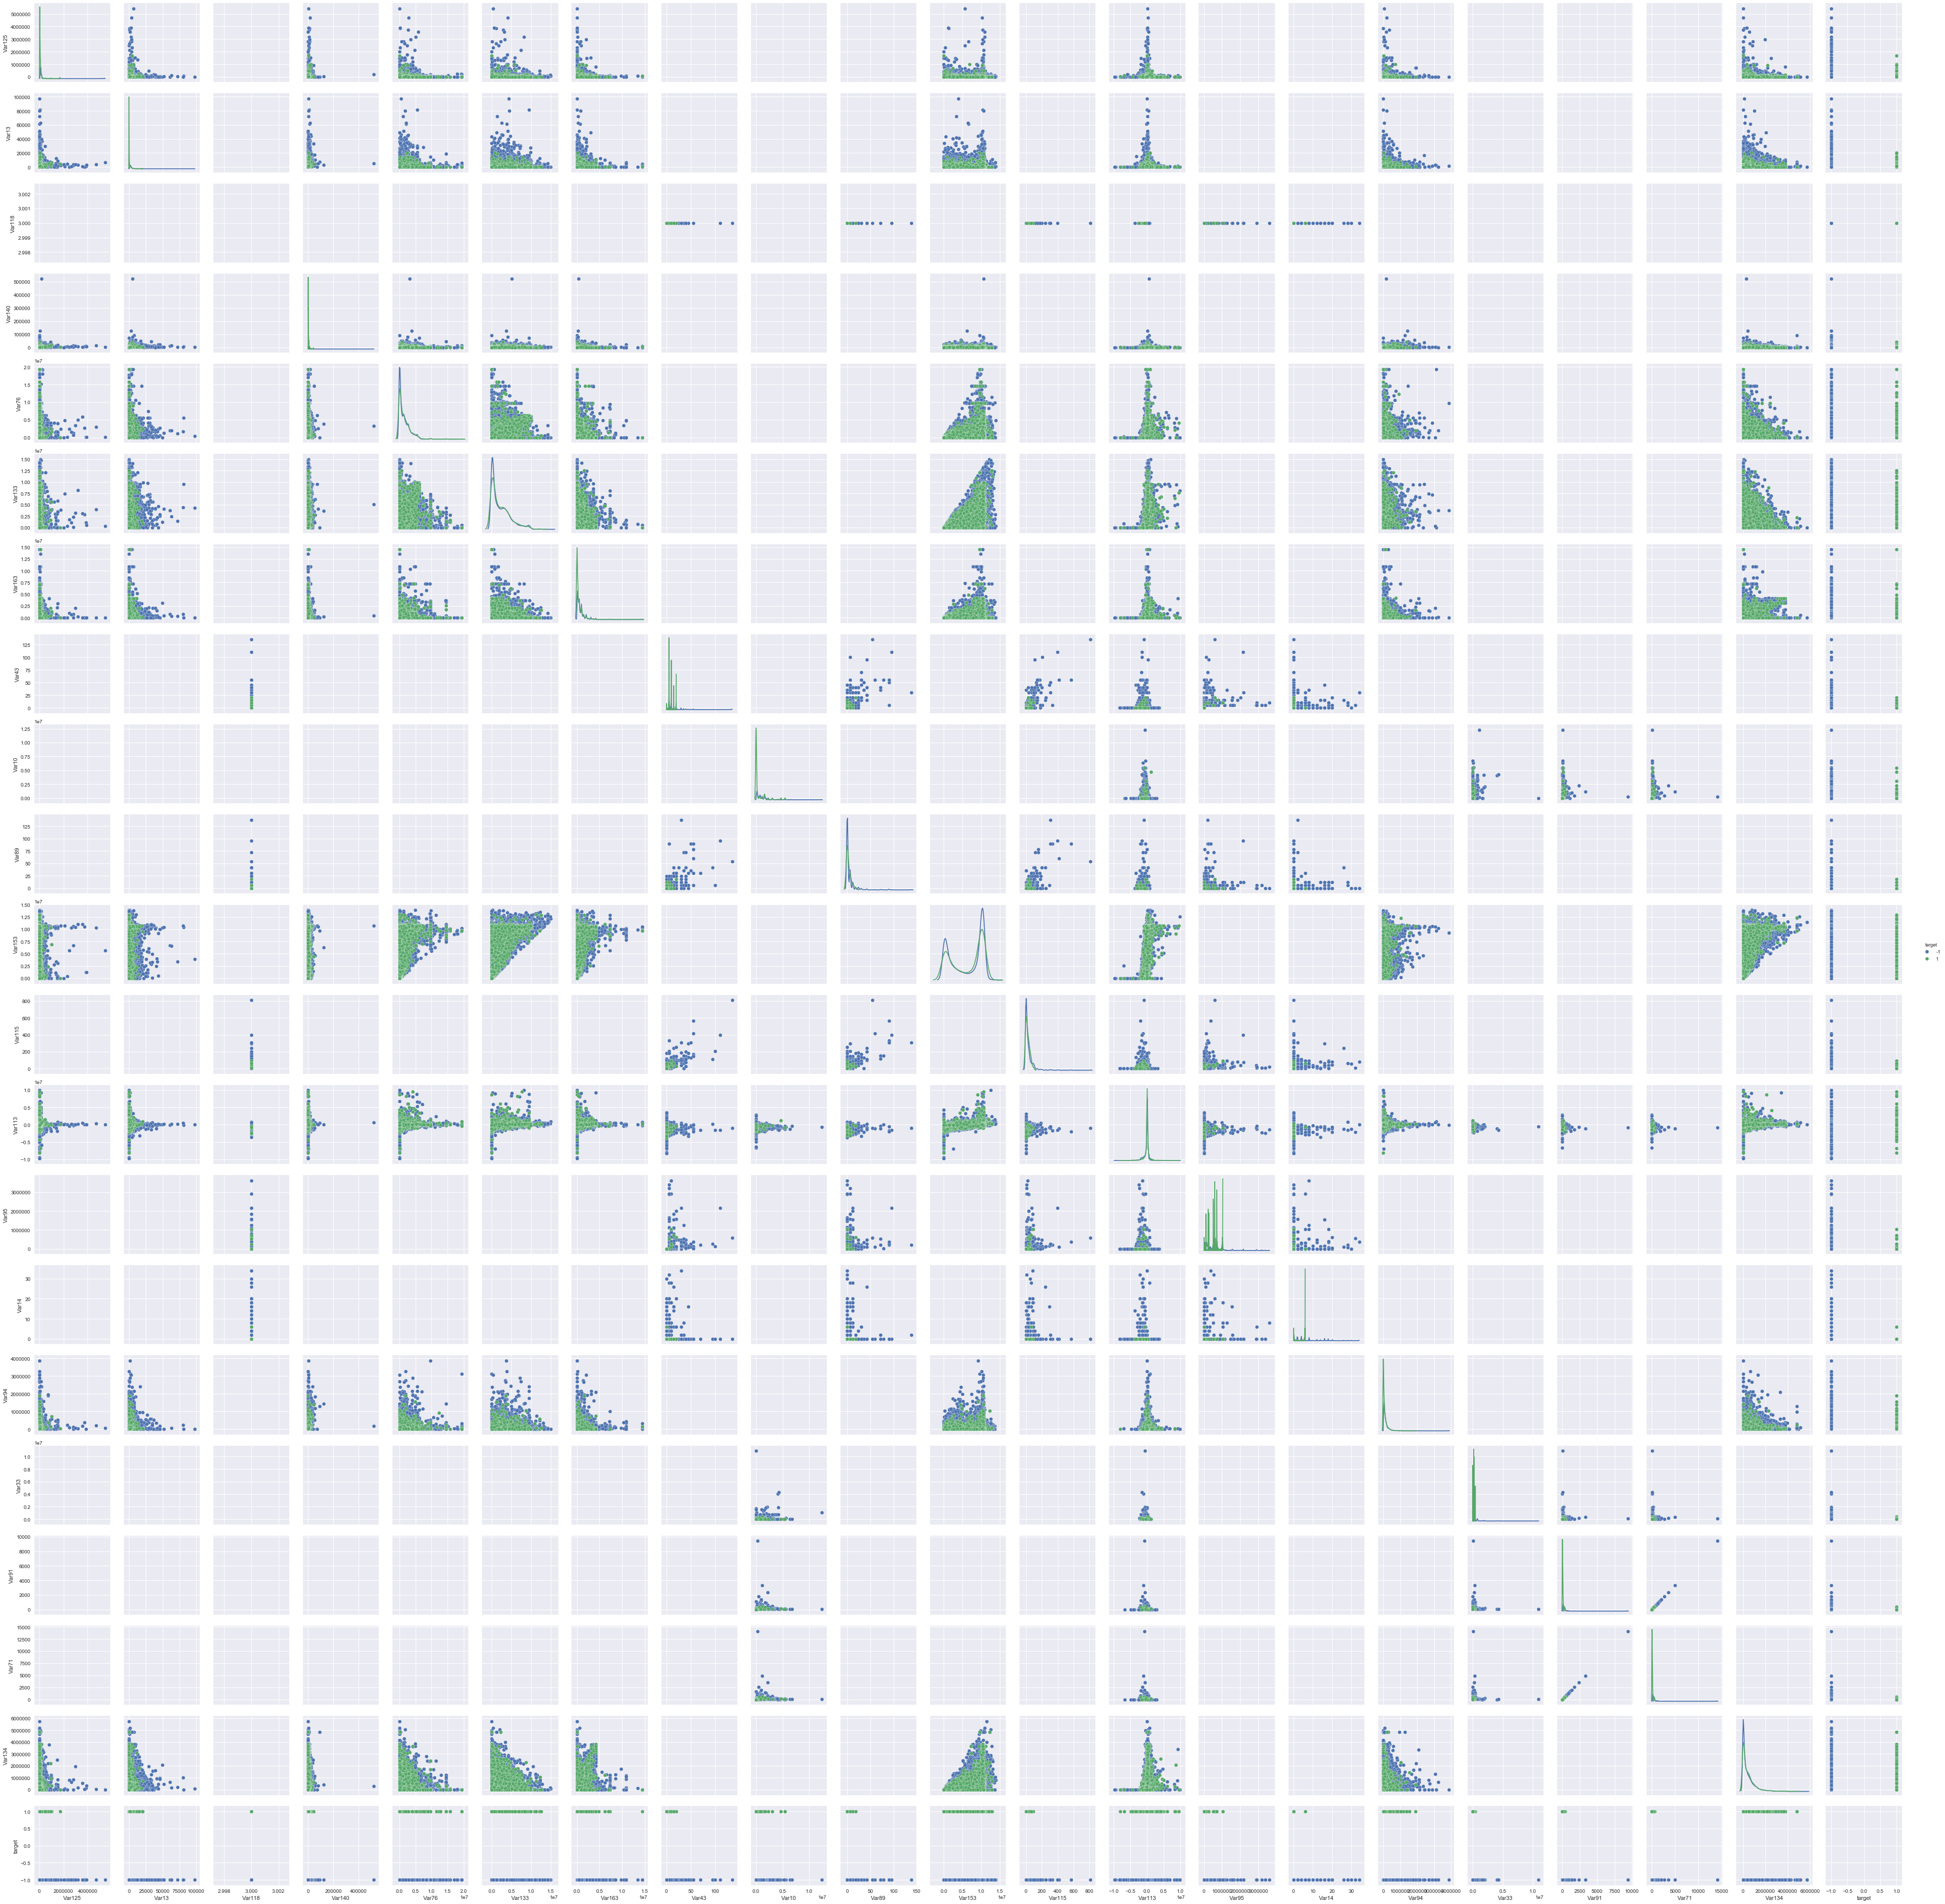

In [18]:
%%time
cols = top.tolist() + ['target']
sns.pairplot(df_numeric[cols], hue='target', diag_kind='kde')

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [39]:
rnd_cols = np.random.choice(df_numeric.columns, 10)

In [43]:
rnd_cols

array(['Var29', 'Var138', 'Var154', 'Var123', 'Var155', 'Var52', 'Var46',
       'Var118', 'Var142', 'Var89'], dtype=object)

Wall time: 2.94 s


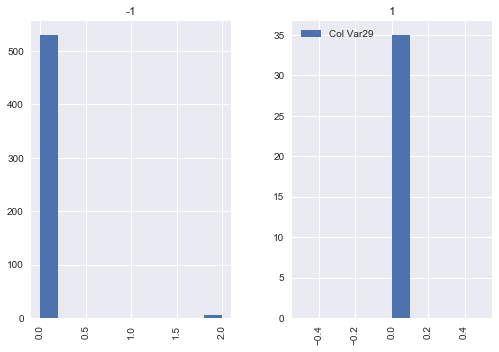

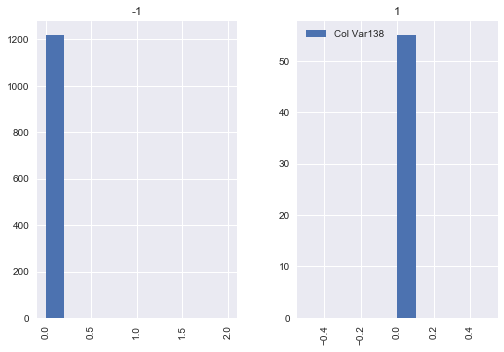

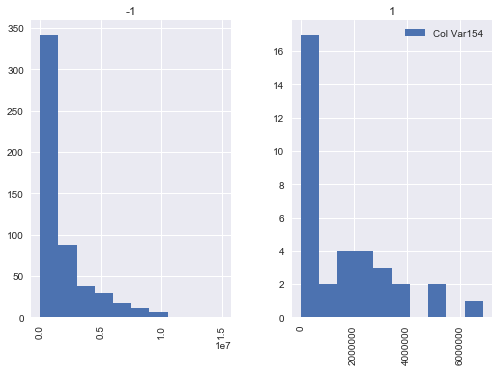

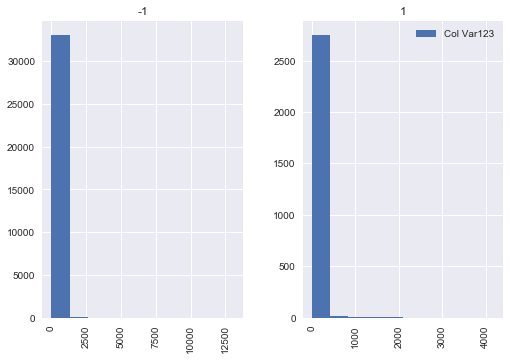

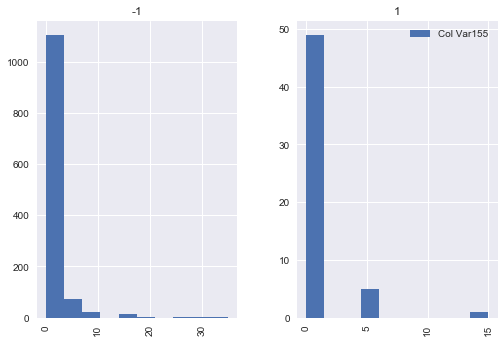

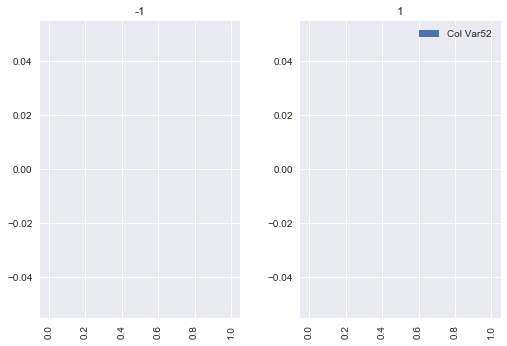

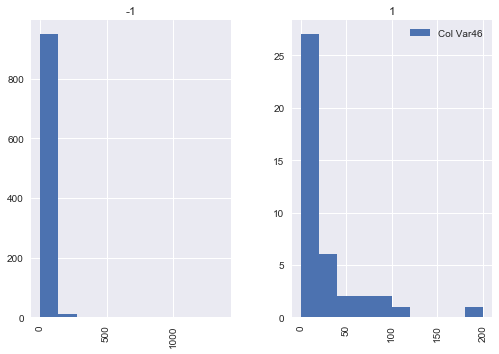

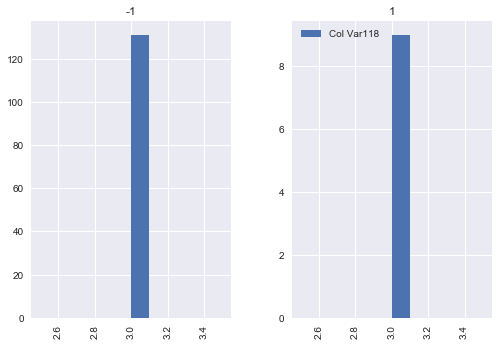

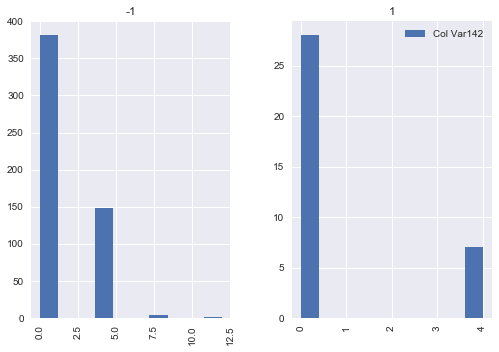

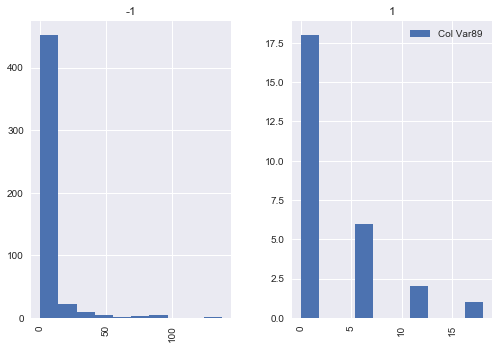

In [44]:
%%time
for c in rnd_cols:
    df_numeric[c].hist(by=df_numeric.target, label='Col {}'.format(c))
    plt.legend()

C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Wall time: 20.9 s


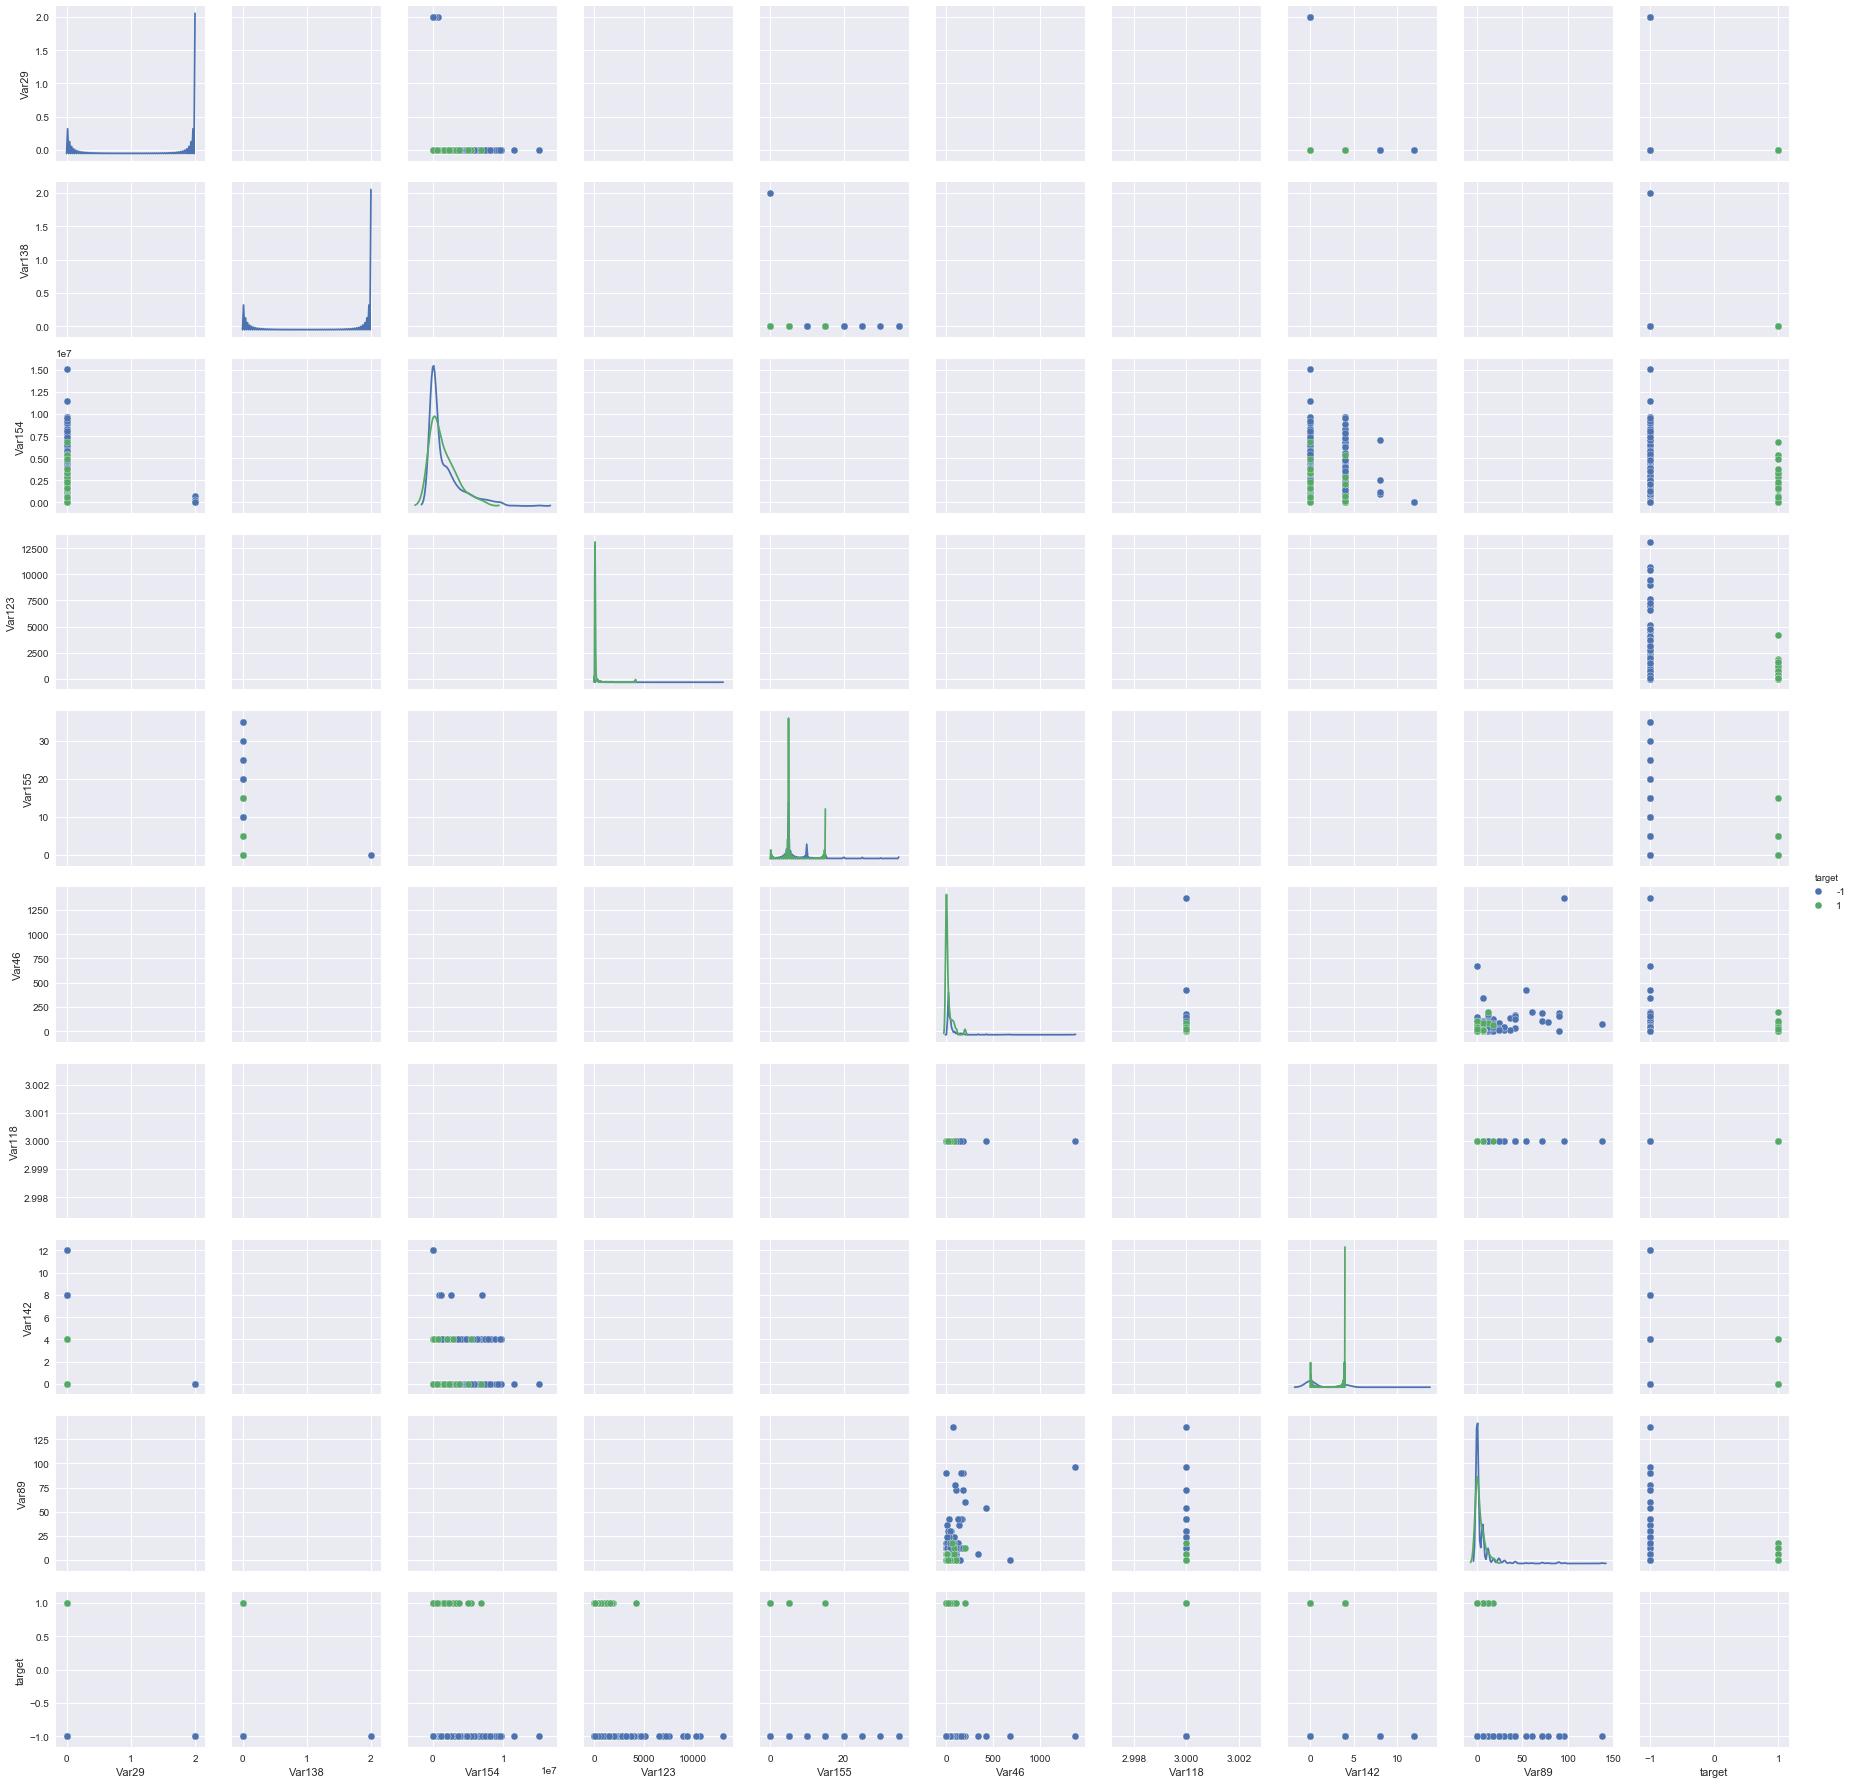

In [42]:
%%time
cols = [c for c in rnd_cols.tolist() if c not in empty_cols] + ['target']
sns.pairplot(df_numeric[cols], hue='target', diag_kind='kde')

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [45]:
top10 = top[:-10]

In [46]:
top10

Index(['Var125', 'Var13', 'Var118', 'Var140', 'Var76', 'Var133', 'Var163',
       'Var43', 'Var10', 'Var89'],
      dtype='object')

Wall time: 3.08 s


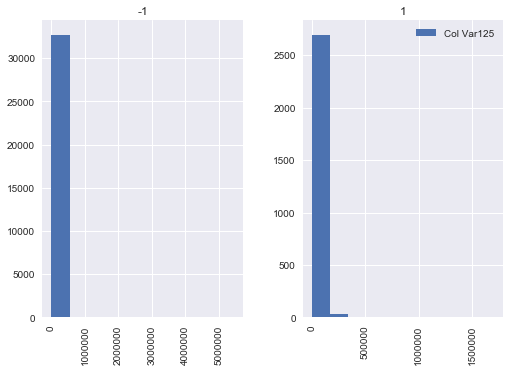

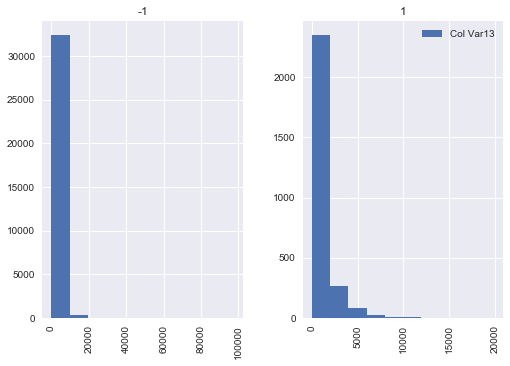

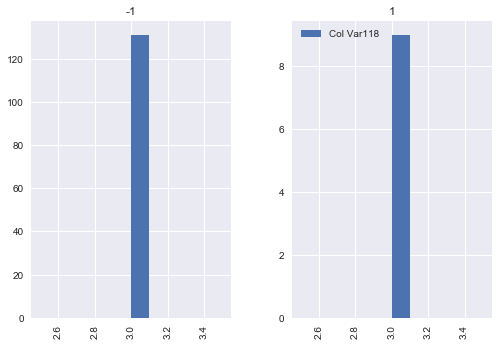

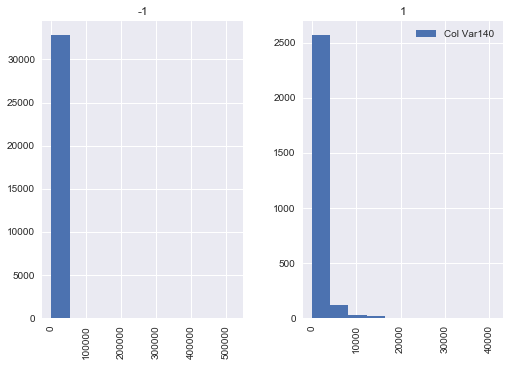

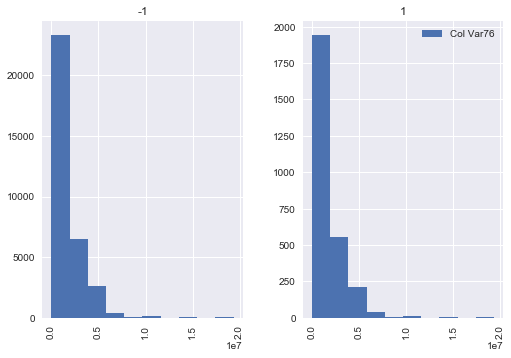

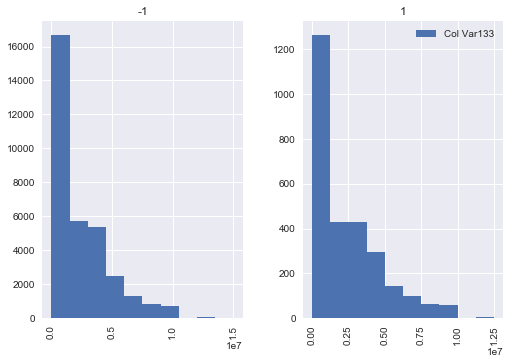

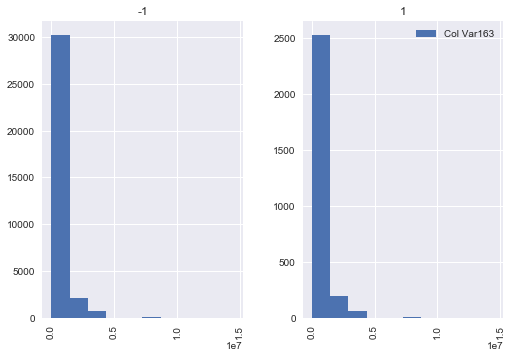

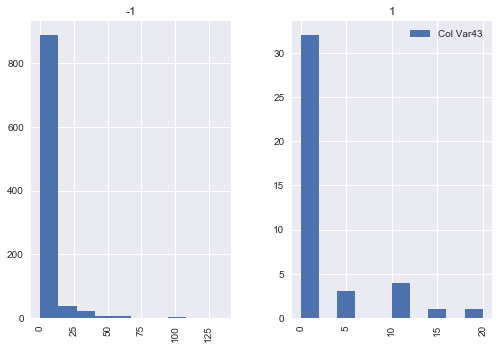

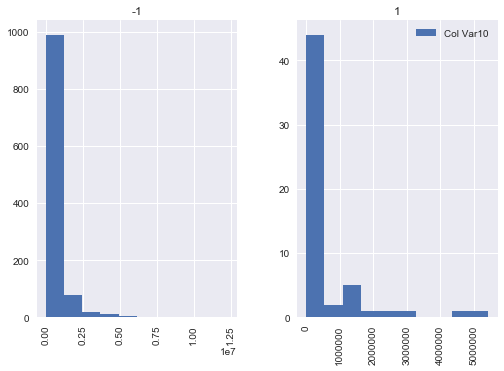

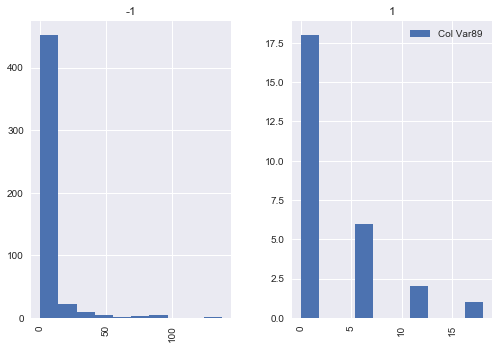

In [47]:
%%time
for c in top10:
    df_numeric[c].hist(by=df_numeric.target, label='Col {}'.format(c))
    plt.legend()

C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Wall time: 39.7 s


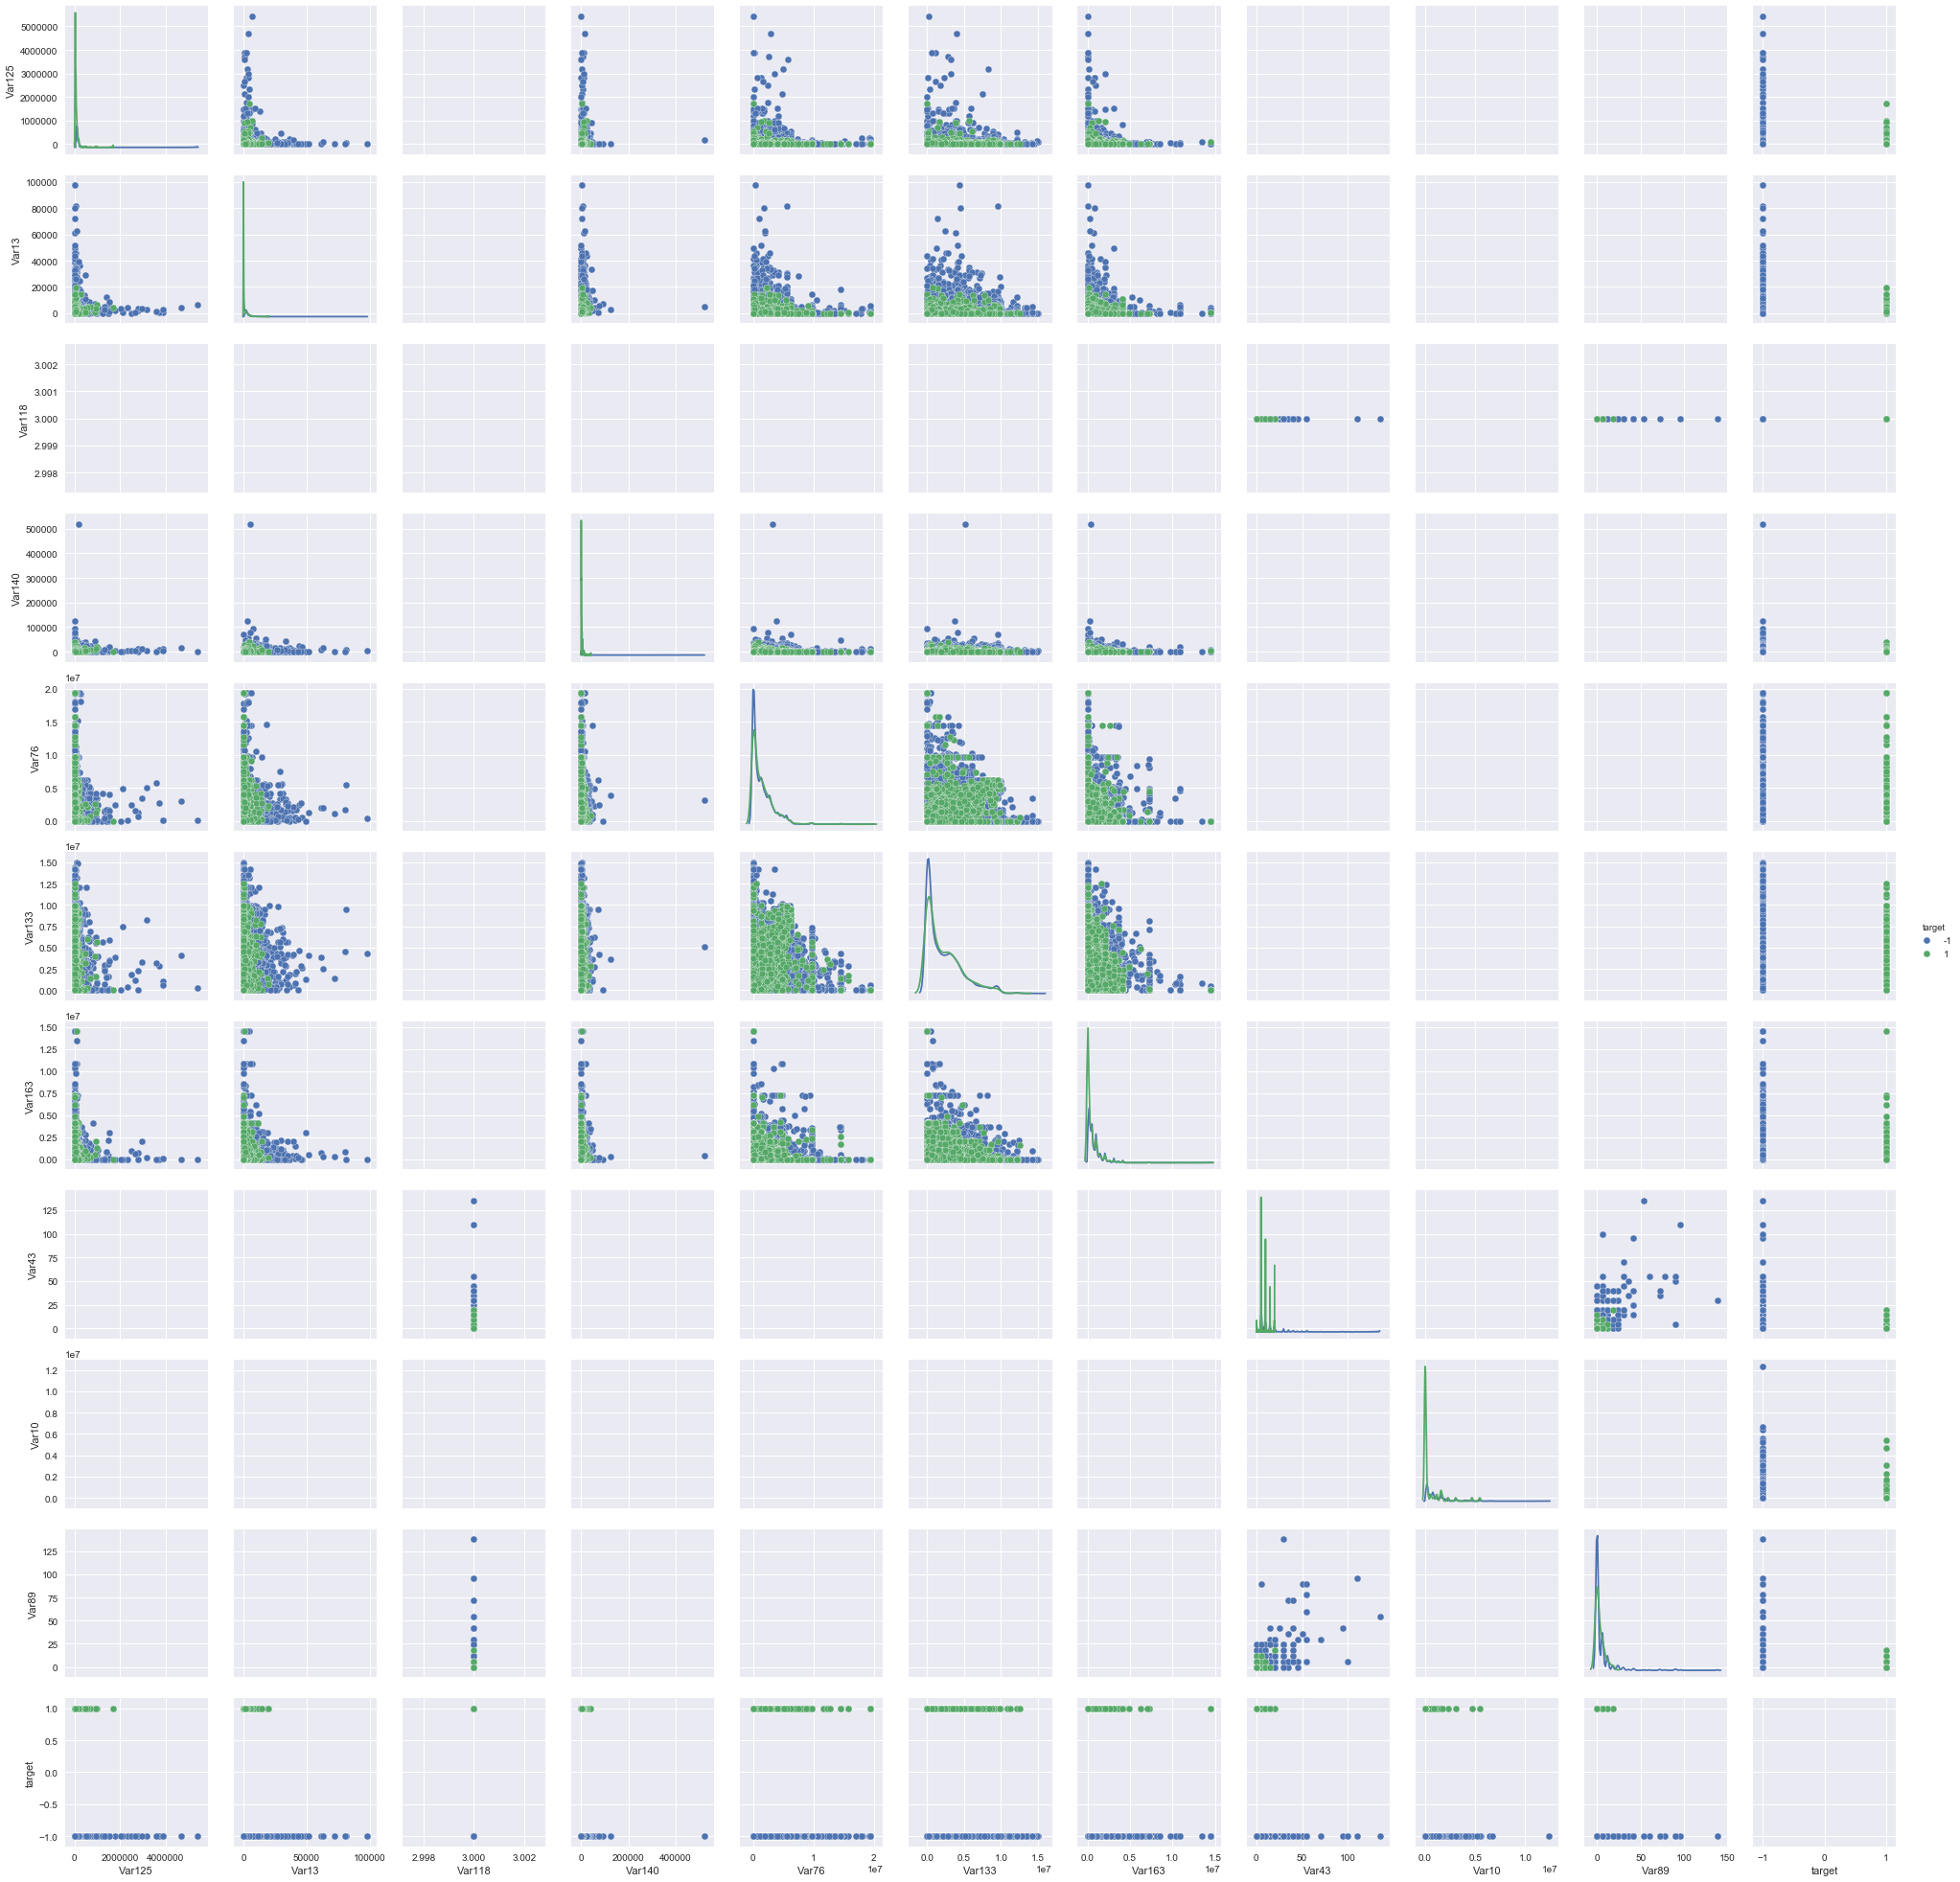

In [48]:
%%time
cols = top10.tolist() + ['target']
sns.pairplot(df_numeric[cols], hue='target', diag_kind='kde')

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [49]:
cat_cols = orange_small_churn_data.columns[-41:-1]

In [50]:
cat_cols

Index(['Var190', 'Var191', 'Var192', 'Var193', 'Var194', 'Var195', 'Var196',
       'Var197', 'Var198', 'Var199', 'Var200', 'Var201', 'Var202', 'Var203',
       'Var204', 'Var205', 'Var206', 'Var207', 'Var208', 'Var209', 'Var210',
       'Var211', 'Var212', 'Var213', 'Var214', 'Var215', 'Var216', 'Var217',
       'Var218', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var224',
       'Var225', 'Var226', 'Var227', 'Var228', 'Var229'],
      dtype='object')

In [51]:
orange_small_churn_data['target'] = orange_small_churn_labels.lbl

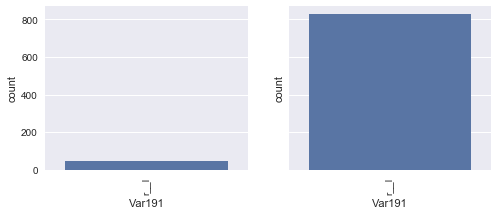

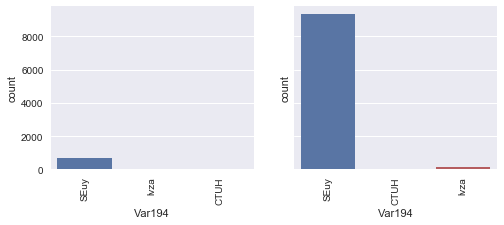

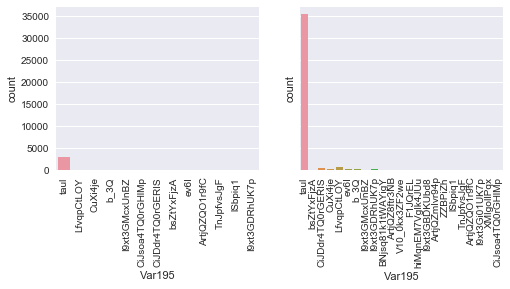

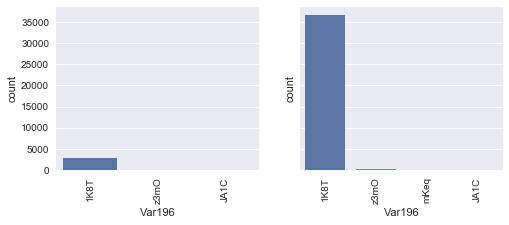

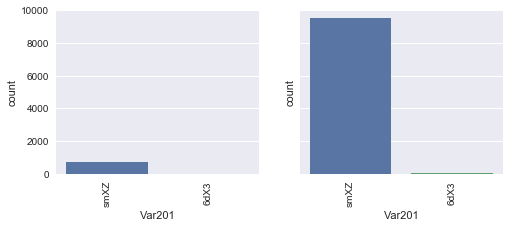

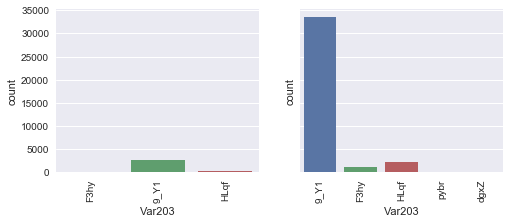

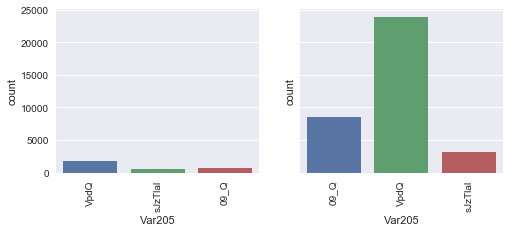

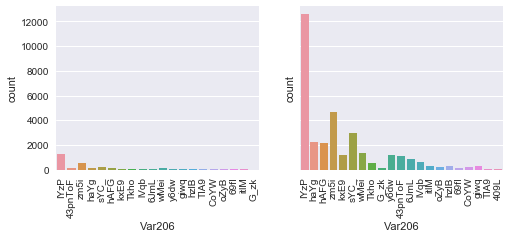

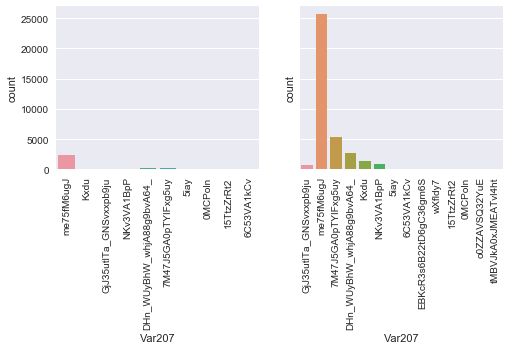

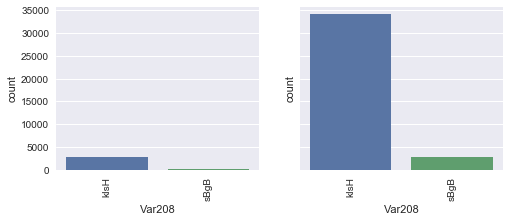

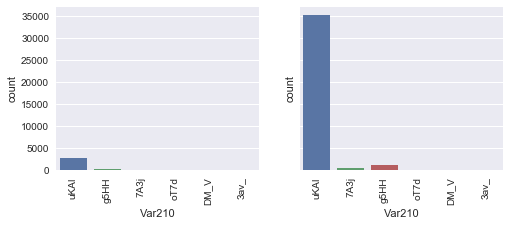

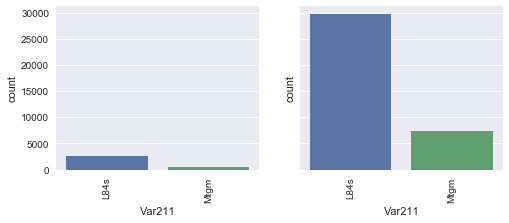

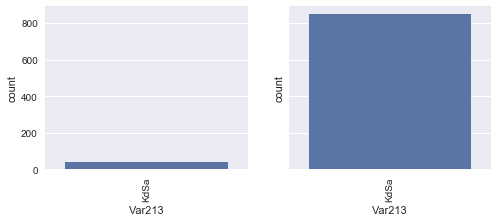

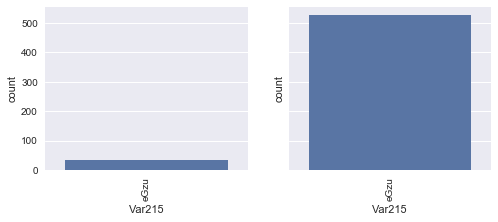

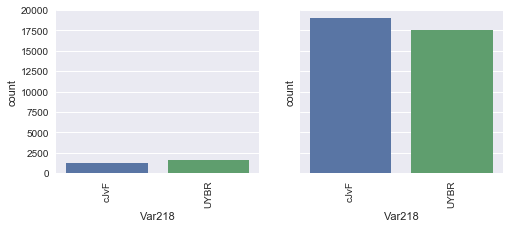

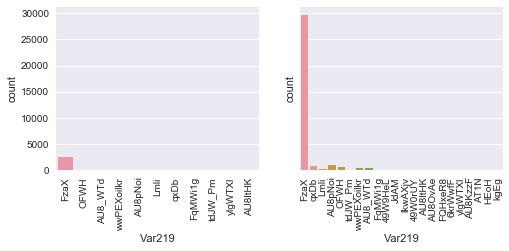

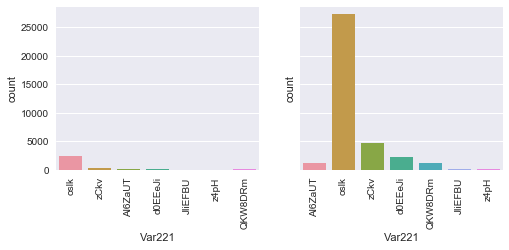

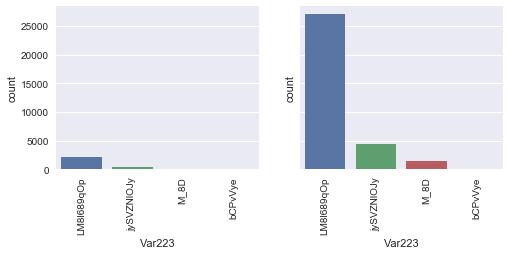

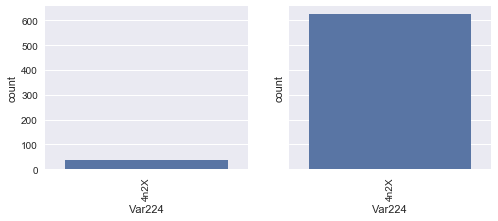

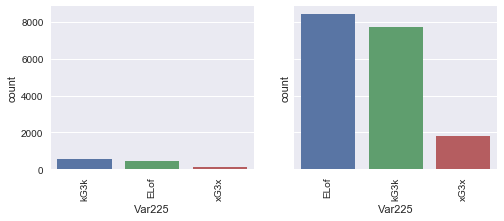

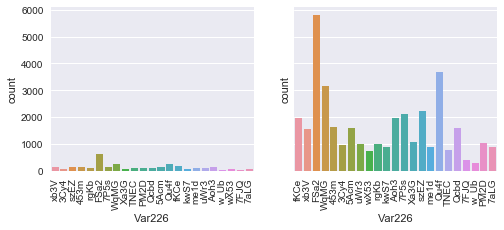

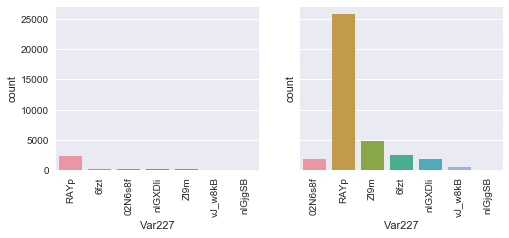

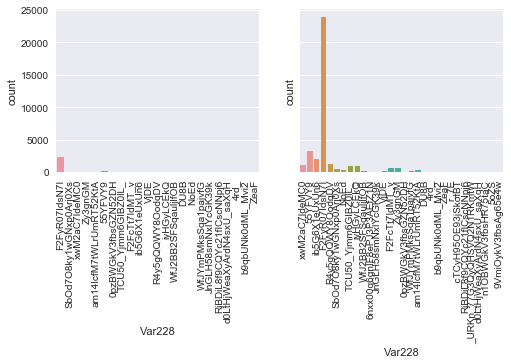

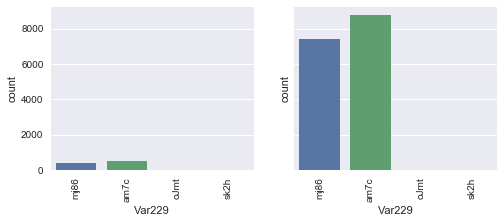

Столбецы которые были пропущены ['Var190', 'Var192', 'Var193', 'Var197', 'Var198', 'Var199', 'Var200', 'Var202', 'Var204', 'Var212', 'Var214', 'Var216', 'Var217', 'Var220', 'Var222'] т.к. слишком много уникальных значений
Столбецы которые были пропущены ['Var209'] т.к. пусты
Wall time: 22.4 s


In [53]:
%%time

skiped_cols = []
empty_skiped_cols = []

for c in cat_cols:
    
    if np.unique(orange_small_churn_data[c].astype('<U1')).shape[0] > 30:
        skiped_cols.append(c)
        continue
        
    if orange_small_churn_data[c].dropna().shape[0] == 0:
        empty_skiped_cols.append(c)
        continue
        
    fig, ax = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
    
    sns.countplot(x=c, data=orange_small_churn_data[orange_small_churn_data.target == 1], ax=ax[0])
    sns.countplot(x=c, data=orange_small_churn_data[orange_small_churn_data.target == -1], ax=ax[1])
    for tick in ax[0].get_xticklabels():
        tick.set_rotation(90)
    for tick in ax[1].get_xticklabels():
        tick.set_rotation(90)
    plt.show()
        
print('Столбецы которые были пропущены {} т.к. слишком много уникальных значений'.format(skiped_cols))
print('Столбецы которые были пропущены {} т.к. пусты'.format(empty_skiped_cols))

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

Выводу по данным:
 * Не сбалансированые метки
 * Шум в данных
 * Пустые столбци (16 штук)
 * Есть потенциально линейно зависимые признаки
 
Вклад в модель могуп принести категориальные признаки:
 * 191, 194, 228 
 
Числовые:
 * 91
 
В связи с дисбалансом классов достаточно сложно судить какие призняки являются бесполезными, т.к. возможно у нас просто недостаточно статистики по некоторым пизнакам для класса "отток" в модели в любом случае необходимо провести отбор признаков, и тогда уже можно будет сделать выводу по результатам.